# EMAIL SPAM DETECTION WITH MACHINE LEARNING

A machine learning model to predict whether the mail recieved is spam or not.
ALGORITHM : Navie Bayes Classification
INPUT : Body of the EMAIL
OUTPUT: Prediction - SPAM / HAM(NOT SPAM)

In [1]:
#Importing required modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing data frame
df = pd.DataFrame(pd.read_excel(r"C:\Users\SIVASRI\Downloads\OASIS\spam.xlsx"))

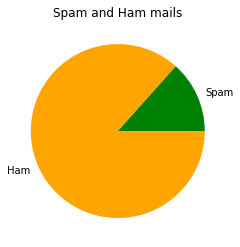

In [3]:
#Fetching emails that are labeled as spam
sc = df[df['v1']=='spam'].size
hc = df.size - df[df['v1']=='spam'].size
plt.pie([sc,hc],labels = ['Spam','Ham'],colors = ['Green','Orange'])
plt.title('Spam and Ham mails')
plt.show()

In [4]:
#Changing the datatype of column into string
df.v2 = df.v2.astype(str)
df.v2

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ﾌ_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [5]:
'''
This block of code will count the frequency of each word given in the mail body.As strings can't be directly used 
in the predictions, this converts the string into releated frequency values.
'''
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit(df.v2)
# Get the feature names
features = feature_vector.get_feature_names()
print("Total number of features: ", len(features))

Total number of features:  8713


C:\Users\SIVASRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
#Transforming the input data into its frequency values
tr_features = count_vectorizer.transform(df.v2)
tr_features.toarray().shape

(5572, 8713)

In [7]:
#Splitting the data into traing and test sets
from sklearn.model_selection import train_test_split
y = df.v1
x = df.v2
x_tr,x_ts,y_tr,y_ts = train_test_split(tr_features,y,test_size = 0.25)

In [8]:
#Building and training the machine learning model
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(x_tr.toarray(), y_tr)

BernoulliNB()

In [9]:
#Predictions using the model
test_ds_predicted = nb_clf.predict(x_tr.toarray())

In [10]:
#Analysis of the model using metrics like accuracy
from sklearn import metrics
print(metrics.classification_report(y_tr, test_ds_predicted))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      3618
        spam       1.00      0.91      0.95       561

    accuracy                           0.99      4179
   macro avg       0.99      0.96      0.97      4179
weighted avg       0.99      0.99      0.99      4179



In [11]:
#Using model for predictions
text = input("Enter text:   ")
print("\nEntered mail body is predicted as: ",nb_clf.predict(count_vectorizer.transform([text]).toarray())[0].upper())

Enter text:   Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Entered mail body is predicted as:  SPAM
